In [9]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
file_path = '/Users/priyadharshan/Desktop/Projects/Election/election_results_2024.csv'
election_data = pd.read_csv(file_path)

In [11]:
election_data.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [21]:
votes_of_party = election_data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

election_data['Margin'] = pd.to_numeric(election_data['Margin'], errors='coerce')

high_margin = election_data.loc[election_data['Margin'].idxmax()]
low_margin = election_data.loc[election_data['Margin'].idxmin()]

Bharatiya Janata Party


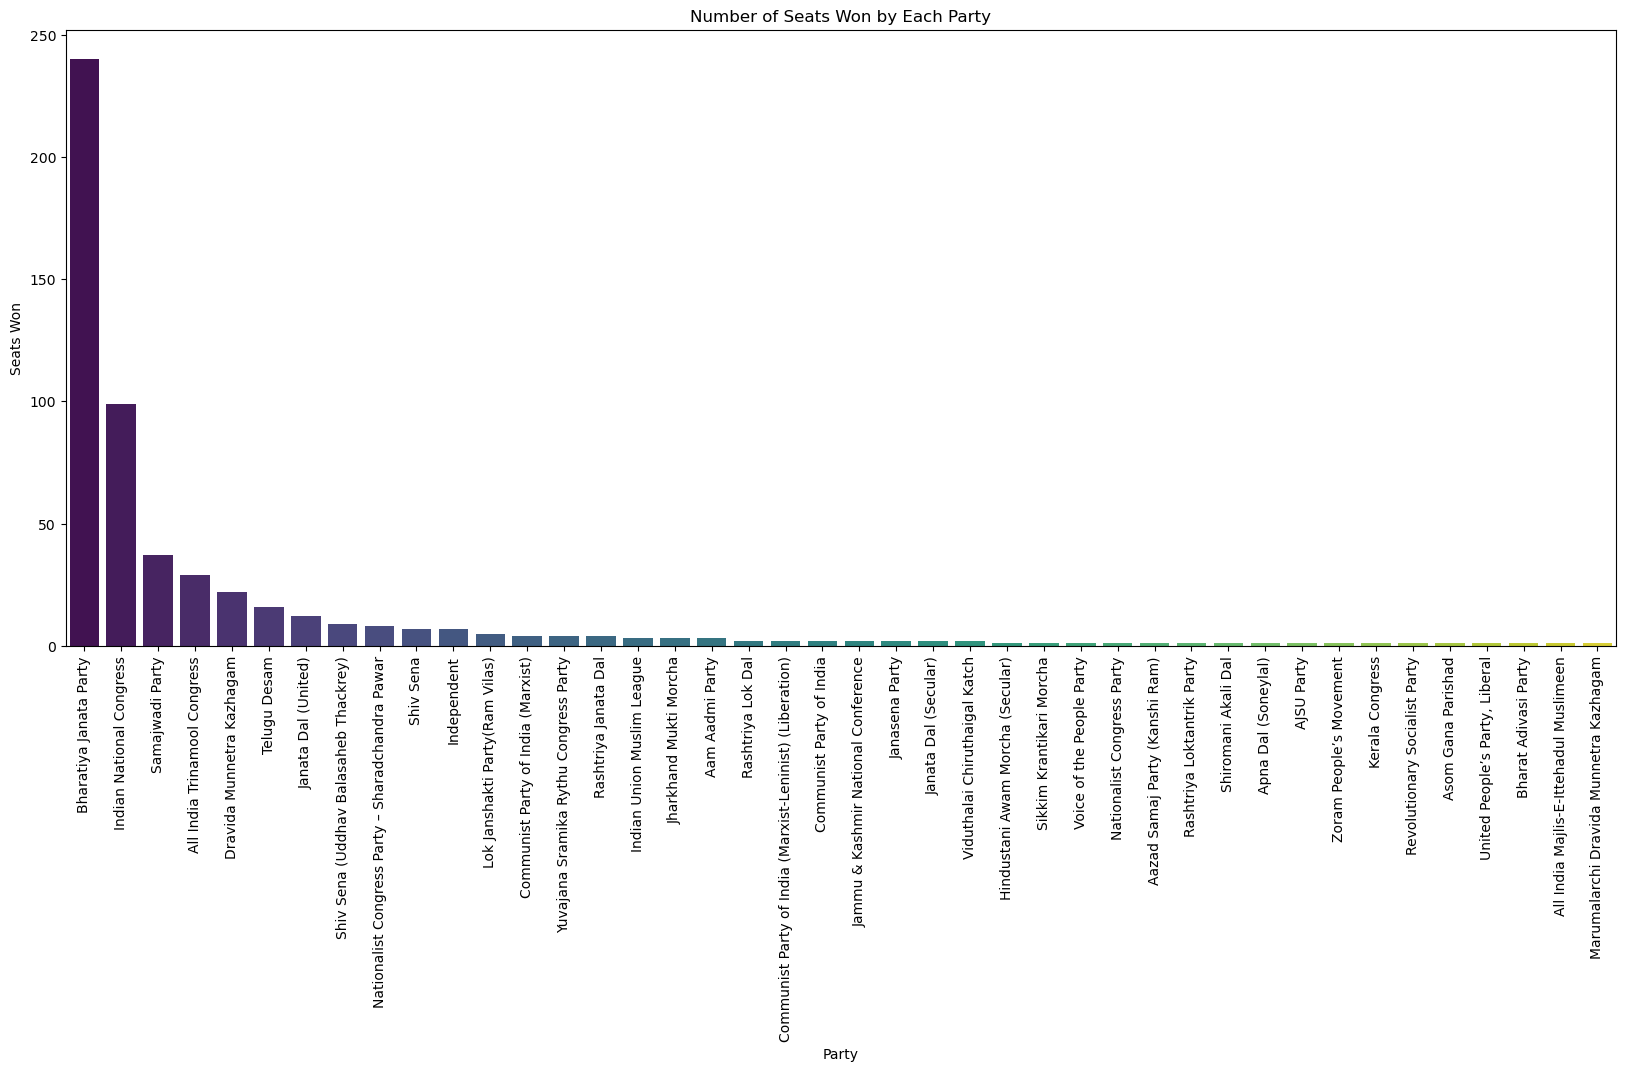

In [26]:
leading_party_highest_votes = votes_of_party.idxmax()
leading_party_lowest_votes = votes_of_party.idxmin()


# Number of seats won by each party
seats_won = election_data['Leading Party'].value_counts()

# Plot number of seats won by each party
plt.figure(figsize=(20, 8))
sns.barplot(x=seats_won.index, y=seats_won.values, palette='viridis')
plt.title('Number of Seats Won by Each Party')
plt.xlabel('Party')
plt.ylabel('Seats Won')
plt.xticks(rotation=90)
plt.show()

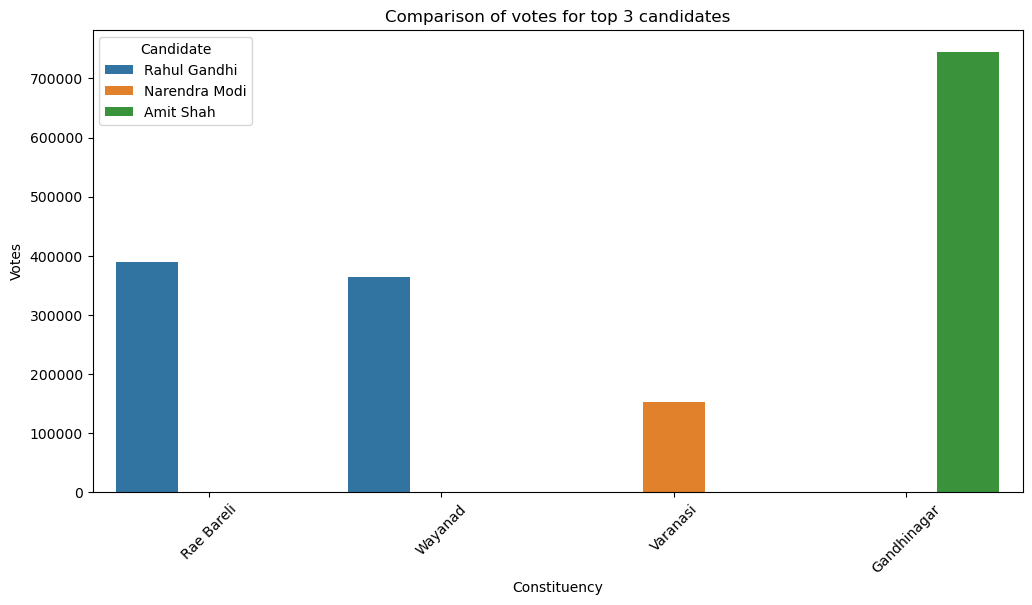

In [33]:
rahul_gandhi = election_data[election_data['Leading Candidate'] == 'RAHUL GANDHI']
narendra_modi = election_data[election_data['Leading Candidate'] == 'NARENDRA MODI']
amit_shah = election_data[election_data['Leading Candidate'] == 'AMIT SHAH']

votes_for_rahul = rahul_gandhi['Margin'].values
votes_for_modi = narendra_modi['Margin'].values[0] if not narendra_modi.empty else 0
votes_for_amit = amit_shah['Margin'].values[0] if not amit_shah.empty else 0

constituency_of_rahul = list(rahul_gandhi['Constituency'])
constituency_of_modi = list(narendra_modi['Constituency'])[0] if not narendra_modi.empty else "Modi Constituency"
constituency_of_amit = list(amit_shah['Constituency'])[0] if not amit_shah.empty else "Amit Shah Constituency"

plot_data = pd.DataFrame({
    'Candidate' : ['Rahul Gandhi'] * len(votes_for_rahul) + ['Narendra Modi' , 'Amit Shah'],
    'Constituency' : constituency_of_rahul + [constituency_of_modi, constituency_of_amit],
    'Votes' : list(votes_for_rahul) + [votes_for_modi, votes_for_amit]
})

plt.figure(figsize=(12,6))
sns.barplot(data = plot_data, x = 'Constituency', y = 'Votes', hue = 'Candidate')
plt.title('Comparison of votes for top 3 candidates')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()


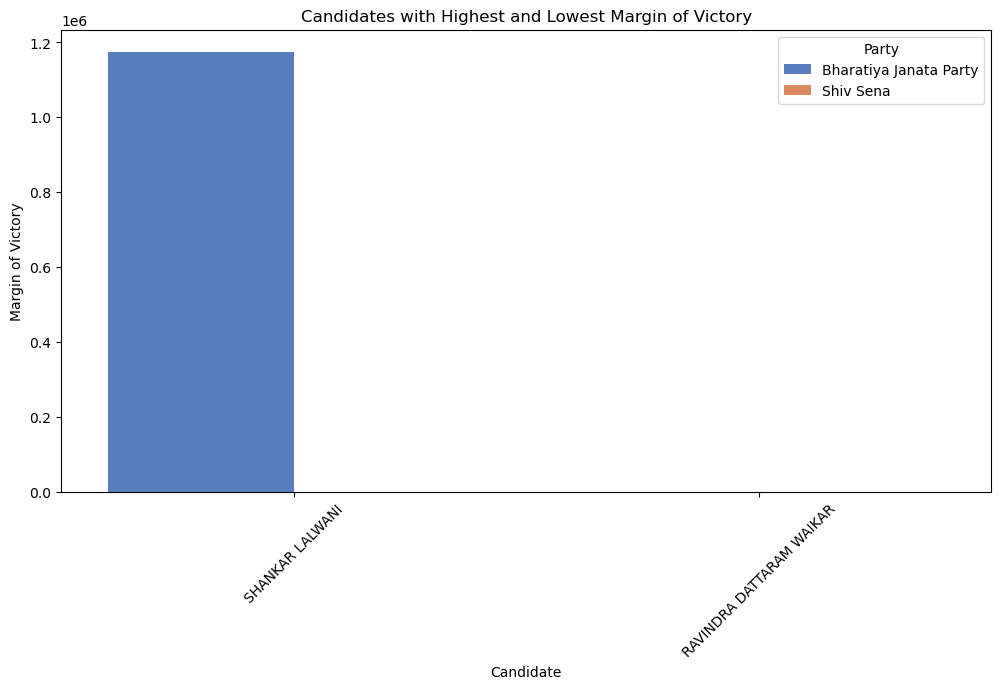

In [38]:
highest_margin = election_data.loc[election_data['Margin'].idxmax()]
lowest_margin = election_data.loc[election_data['Margin'].idxmin()]

# Combine the data
plot_data = pd.DataFrame({
    'Candidate': [highest_margin['Leading Candidate'], lowest_margin['Leading Candidate']],
    'Party': [highest_margin['Leading Party'], lowest_margin['Leading Party']],
    'Margin': [highest_margin['Margin'], lowest_margin['Margin']]
})

# Plot the comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='Candidate', y='Margin', hue='Party', palette='muted')
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=45)
plt.show()


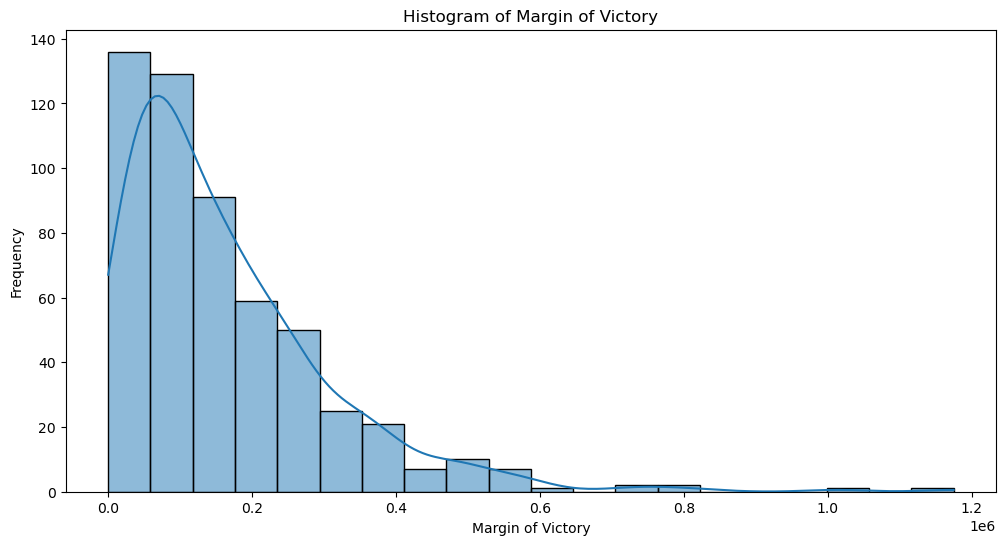

In [43]:
plt.figure(figsize=(12, 6))
sns.histplot(election_data['Margin'], bins=20, kde=True)
plt.title('Histogram of Margin of Victory')
plt.xlabel('Margin of Victory')
plt.ylabel('Frequency')
plt.show()

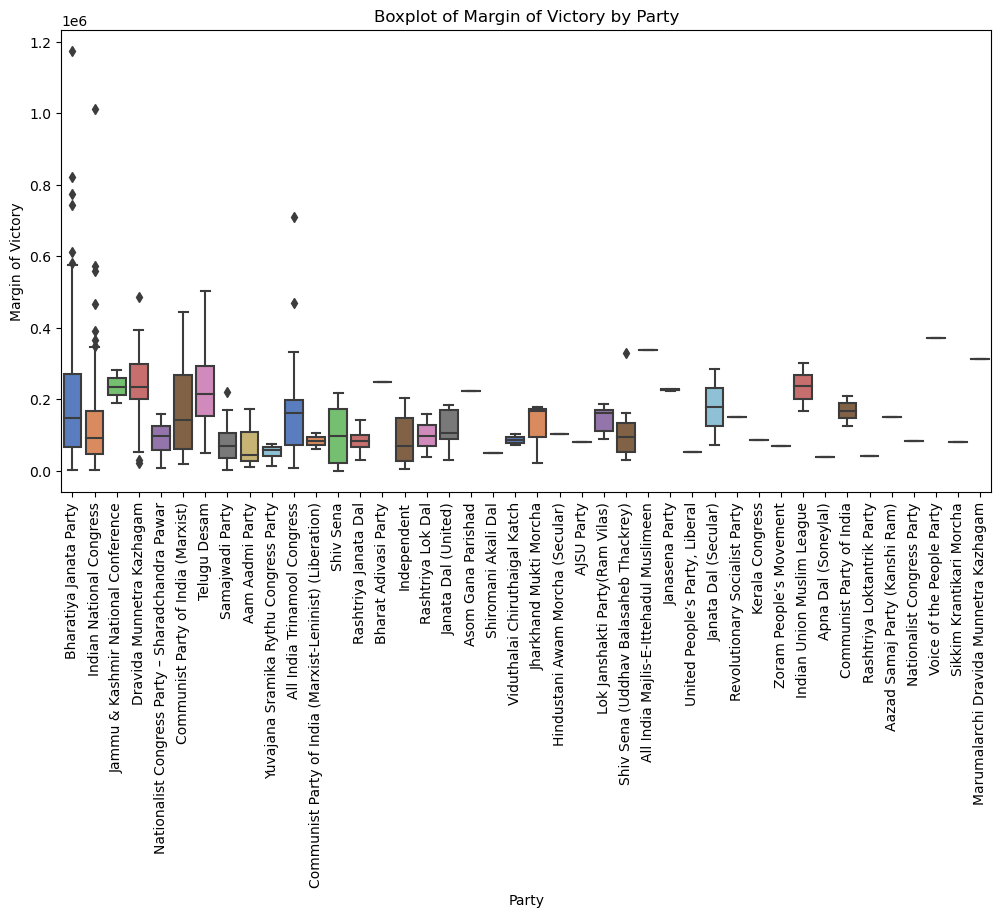

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=election_data, x='Leading Party', y='Margin', palette='muted')
plt.title('Boxplot of Margin of Victory by Party')
plt.xlabel('Party')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=90)
plt.show()

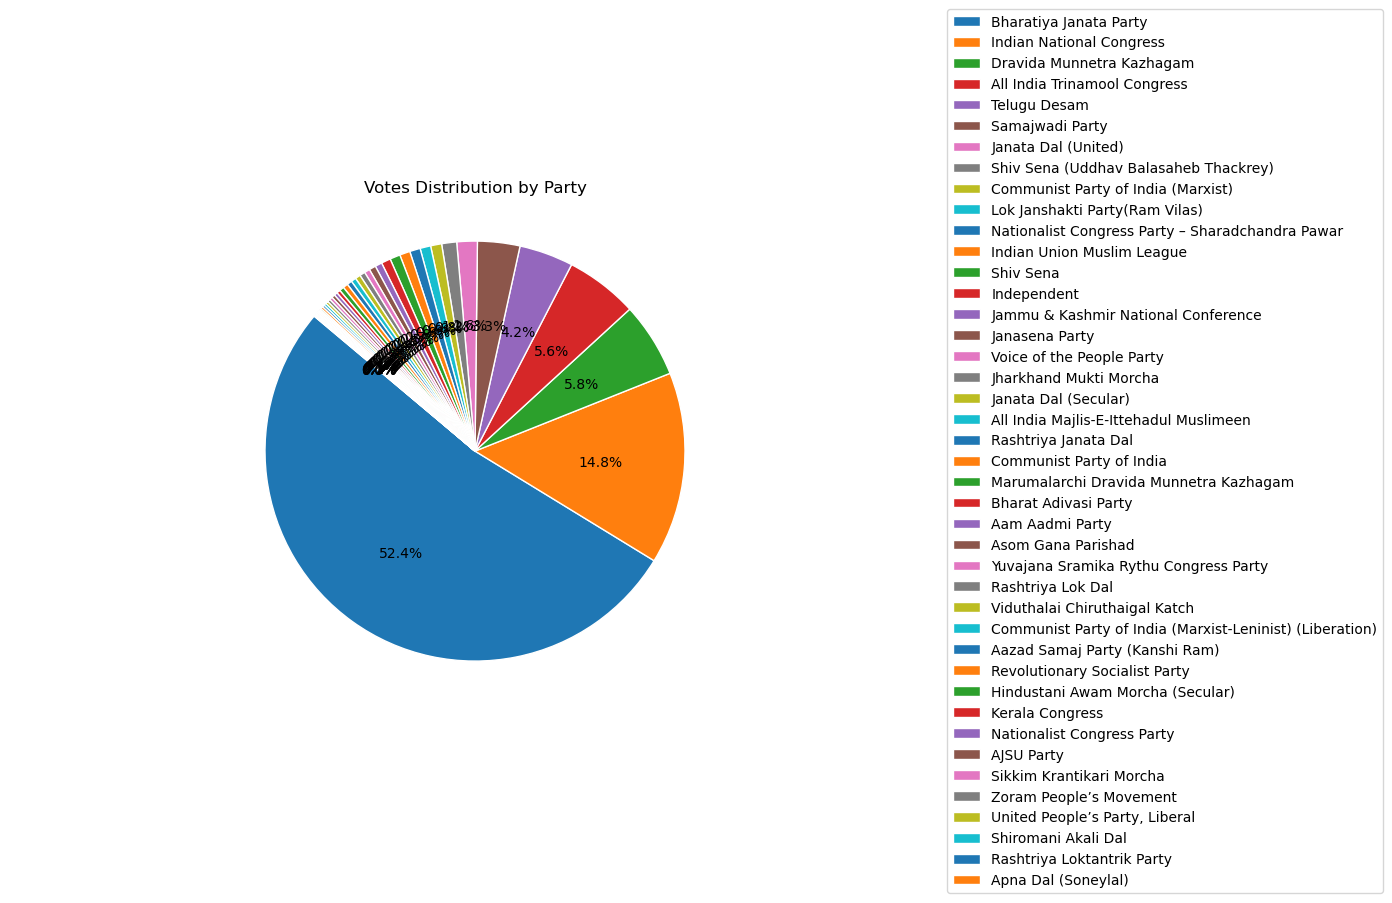

In [55]:
votes_by_party = election_data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(12, 6))
wedges, texts, autotexts = plt.pie(votes_by_party, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=votes_by_party.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()

In [56]:
trailing_party_votes = election_data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats = election_data['Trailing Party'].value_counts()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

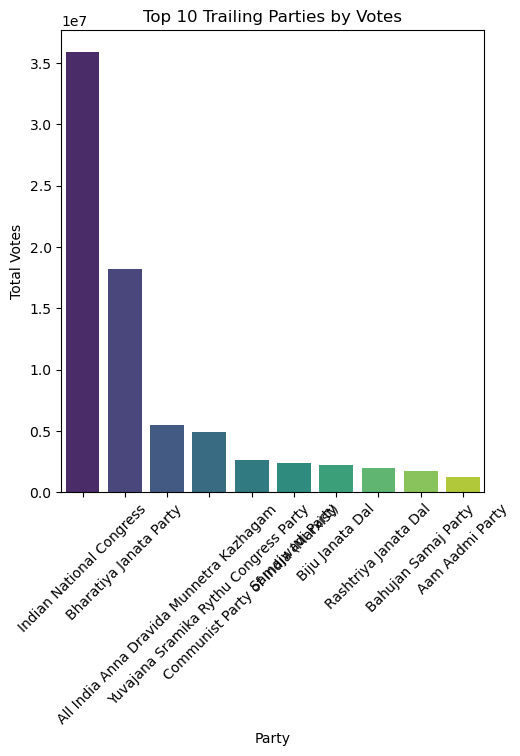

In [58]:
plt.figure(figsize=(12, 6))

# Plot votes distribution by trailing party
plt.subplot(1, 2, 1)
sns.barplot(x=trailing_party_votes.index[:10], y=trailing_party_votes.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Votes')
plt.xlabel('Party')
plt.ylabel('Total Votes')
plt.xticks(rotation=45)

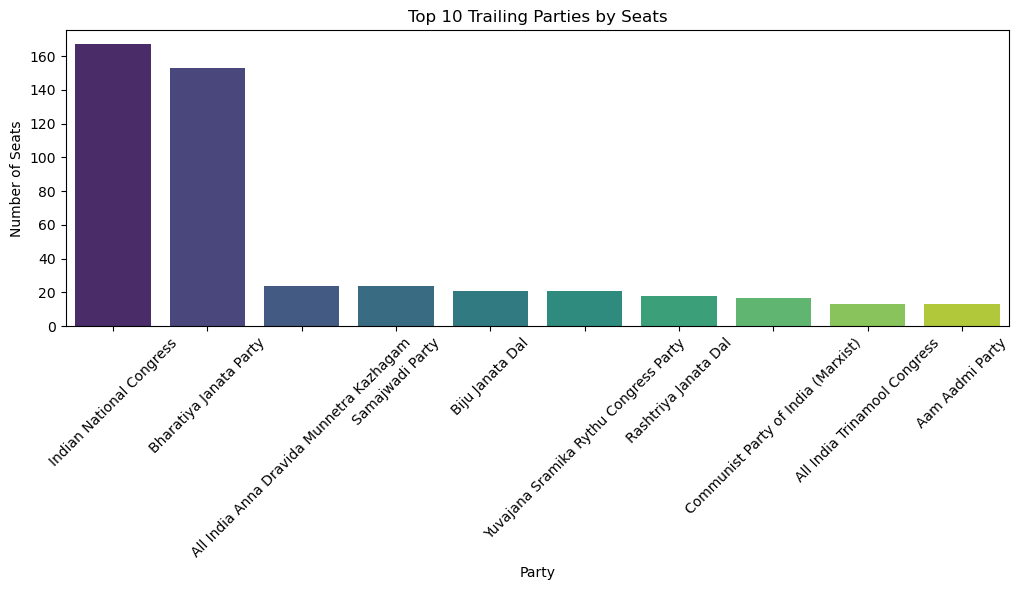

In [60]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 2)
sns.barplot(x=trailing_party_seats.index[:10], y=trailing_party_seats.values[:10], palette='viridis')
plt.title('Top 10 Trailing Parties by Seats')
plt.xlabel('Party')
plt.ylabel('Number of Seats')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()